# Issue 6: Addressing Class Imbalance in Machine Learning

## Description:
- Check for **class imbalance** in the target variable (Y).
- Apply **balancing techniques**:
  - **SMOTE (Synthetic Minority Over-sampling Technique)**
  - **Oversampling**
  - **Undersampling**
- Train and evaluate a **classifier (e.g., Random Forest) before and after balancing**.
- Compare **accuracy, precision, recall, and F1-score** to measure impact.

# Importing Libraires

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report

In [77]:
data = pd.read_csv('encoded-in-vehicle-coupon-recommendation.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,1,2,4,0,0,0,3,...,3,0,0,2,3,2,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,0,0,2,3,2,0,0,0,0
2,1,1,2,2,0,1,1,0,0,3,...,3,0,0,2,3,2,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,0,0,2,3,2,1,0,0,0
4,1,1,2,2,2,2,0,0,0,3,...,3,0,0,2,3,2,1,0,0,0


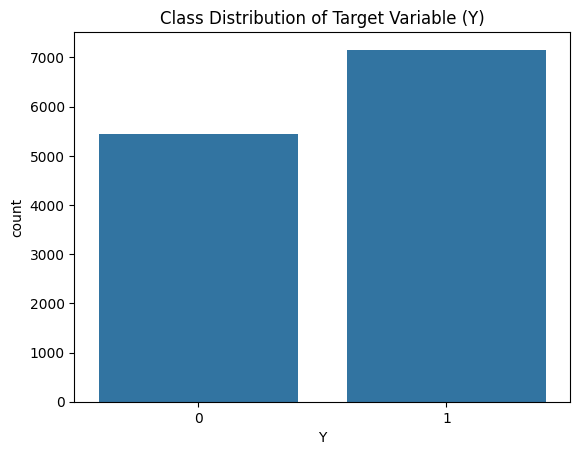

In [78]:
# Distribution of Target Class
sns.countplot(x=data["Y"])
plt.title("Class Distribution of Target Variable (Y)")
plt.show()

In [79]:
print(data["Y"].value_counts())

Y
1    7157
0    5453
Name: count, dtype: int64


In [80]:
# Splitting the dataset

X = data.drop("Y", axis=1)
y = data["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Training on Imbalanced Dataset with Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Imbalanced Dataset And Random Forest Classifier:")
print()
print(classification_report(y_test, y_pred))

Imbalanced Dataset And Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1106
           1       0.75      0.81      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.73      2522
weighted avg       0.74      0.74      0.74      2522



In [82]:
# Training on Imbalanced Dataset with XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, n_estimators=100)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("Imbalanced Dataset And XGBoost Classifier:")
print()
print(classification_report(y_test, y_pred))

Imbalanced Dataset And XGBoost Classifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



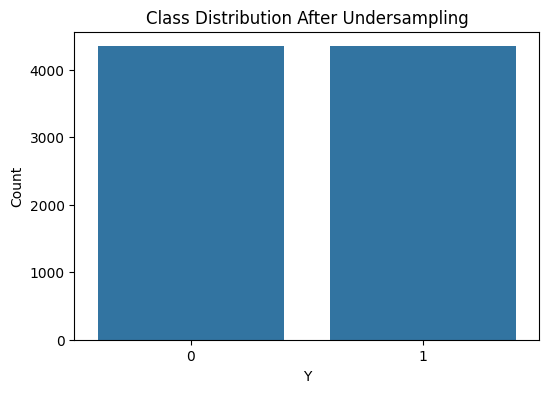

In [83]:
# Applying Random Undersampling

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_under)
plt.title("Class Distribution After Undersampling")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

In [84]:
# Training on Under Sampled Dataset with Random Forest Classifier

rf_clf_under = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf_under.fit(X_train_under, y_train_under)
y_pred_under = rf_clf_under.predict(X_test)
print("Under Sampled Dataset And Random Forest Classifier:")
print()
print(classification_report(y_test, y_pred))

Under Sampled Dataset And Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



In [85]:
# Training on Under Sampled Dataset with XGBClassifier

xgb_clf_under = XGBClassifier(random_state=42, n_estimators=100)
xgb_clf_under.fit(X_train_under, y_train_under)
y_pred_under = xgb_clf_under.predict(X_test)
print("Under Sampled Dataset And XGBClassifier:")
print()
print(classification_report(y_test, y_pred))

Under Sampled Dataset And XGBClassifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



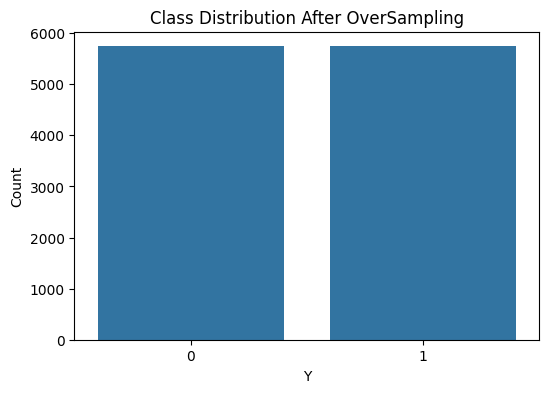

In [86]:
# Applying Random Oversampling

oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_over)
plt.title("Class Distribution After OverSampling")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

In [87]:
# Training on Over Sampled Dataset with Random Forest Classifier

rf_clf_over = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf_over.fit(X_train_over, y_train_over)
y_pred_over = rf_clf_over.predict(X_test)
print("Over Sampled Dataset And Random Forest Classifier:")
print()
print(classification_report(y_test, y_pred))

Over Sampled Dataset And Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



In [88]:
# Training on Over Sampled Dataset with XGBClassifier

xgb_clf_over = XGBClassifier(random_state=42, n_estimators=100)
xgb_clf_over.fit(X_train_over, y_train_over)
y_pred_over = xgb_clf_over.predict(X_test)
print("Over Sampled Dataset And Random Forest Classifier:")
print()
print(classification_report(y_test, y_pred))

Over Sampled Dataset And Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



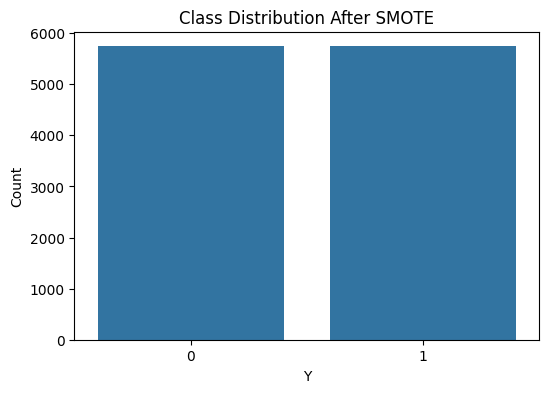

In [89]:
# Applying SMOTE to balance dataset

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

In [90]:
# Training on SMOTE Dataset with Random Forest Classifier

rf_clf_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_clf_smote.predict(X_test)
print("SMOTE Dataset And Random Forest Classifier:")
print()
print(classification_report(y_test, y_pred))

SMOTE Dataset And Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



In [91]:
# Training on SMOTE Dataset with Random Forest Classifier

xgb_clf_smote = XGBClassifier(random_state=42, n_estimators=100)
xgb_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_clf_smote.predict(X_test)
print("SMOTE Dataset And Random Forest Classifier:")
print()
print(classification_report(y_test, y_pred))

SMOTE Dataset And Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.73      0.74      2522
weighted avg       0.74      0.74      0.74      2522



# Analysis

1. UnderSampling : Randomly Removes some Rows from Majority Class to make size equal to Minority Class.
2. OverSampling : Randomly adds some some in Minority Class to make size equal to Majority Class.
3. SMOTE : Synthetically create dataset and add to Minority Class to make size equal to Majority Class.
4. Recall : Value of Recall increased from 0.65 in imbalanced minority Class to 0.67 in SMOTE Minority Class.
5. f1 score : Value of f1 score increased from 0.68 in imbalanced minority class to 0.70 in SMOTE minority class.
6. while precision and accuracy remained same before and after applying SMOTE. Hence, SMOTE only balances the dataset minority and majority class such that it won't become biased towards Majority class, but won't guarantee to increase the accuracy of the model.